### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
speciesTable = penguins.groupby(['species','sex']).size().unstack('species', fill_value=0)
speciesTable

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


<AxesSubplot:xlabel='sex'>

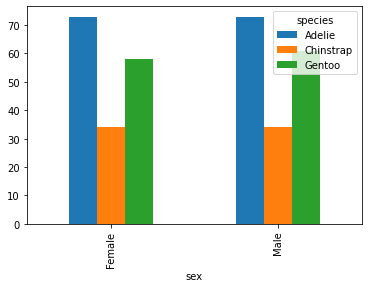

In [4]:
speciesTable.plot(kind='bar')

In [5]:
islandTable = penguins.groupby(['island','sex']).size().unstack('island', fill_value=0)
islandTable

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


<AxesSubplot:xlabel='sex'>

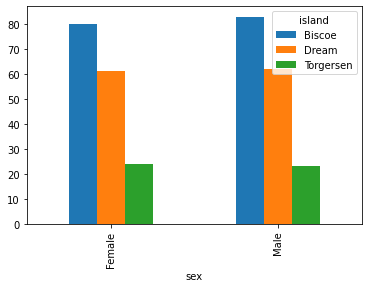

In [6]:
islandTable.plot(kind='bar')

Looking at both barplots, there is almost no difference between the female and male graphs. The Gentoo one in the islands table has a slight difference in height, but that's it.

In [7]:
from scipy.stats import chi2_contingency

![](https://miro.medium.com/max/532/1*S8rfFkmLhDbOz4RGNwuz6g.png)

In [8]:
chi2_contingency(speciesTable)

(0.04860717014078319,
 0.9759893689765846,
 2,
 array([[72.34234234, 33.69369369, 58.96396396],
        [73.65765766, 34.30630631, 60.03603604]]))

In [9]:
chi2_contingency(islandTable)

(0.05759904881286206,
 0.971611229281065,
 2,
 array([[80.76576577, 60.94594595, 23.28828829],
        [82.23423423, 62.05405405, 23.71171171]]))

For both tables, there is a ~5% chance there is a correlation between the two data types. This makes sense, since there shouldn't be any correlation in both comparisons.